# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
#Dependencies
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
import time

#API Key
from api_keys import weather_api_key

retrieved_data_file = "data_cities.csv"

output_file = "output_data.csv"

latitude = (-90, 90)
longitude = (-180, 180)


## Generate Cities List

In [3]:
# List for holding latitude and longitude and cities
lats_longs = []
cities = []

# Create a set of random combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_longs = zip(lats, longs)

# Identify nearest city for combinations
for lats_longs in lats_longs:
    city = citipy.nearest_city(lats_longs[0], lats_longs[1]).city_name
    
    # add unique cities to list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
main_url = url + weather_api_key
main_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=dd37b7776d0dd796a4150454daa58f09'

In [7]:
name_of_city = []
clouds = []
country = []
dates = []
humidity = []
latitude = []
longitude = []
temp_high = []
wind_speed = []
count = 0

   
for city in cities:
    weather_response = requests.get(main_url + "&q=" + city + "&units=Imperial")
    weather_out = weather_response.json()
    try:
        name_of_city.append(weather_out['city']['name'])
        clouds.append(weather_out['list'][0]['clouds']['all'])
        country.append(weather_out['city']['country'])
        dates.append(weather_out['list'][0]['dt'])
        humidity.append(weather_out['list'][0]['main']['humidity'])
        latitude.append(weather_out['city']['coord']['lat'])
        longitude.append(weather_out['city']['coord']['lon'])
        temp_high.append(weather_out['list'][0]['main']['temp_max'])
        wind_speed.append(weather_out['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except(KeyError, IndexError):
        print("No city found - skip record") 
                
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing record 1 of Set 1 | sembe
Processing record 2 of Set 1 | cape town
Processing record 3 of Set 1 | ushuaia
Processing record 4 of Set 1 | castro
Processing record 5 of Set 1 | contamana
Processing record 6 of Set 1 | provideniya
Processing record 7 of Set 1 | nanortalik
Processing record 8 of Set 1 | puerto del rosario
Processing record 9 of Set 1 | bredasdorp
Processing record 10 of Set 1 | grants
Processing record 11 of Set 1 | port elizabeth
No city found - skip record
Processing record 12 of Set 1 | bonthe
Processing record 13 of Set 1 | puerto ayora
Processing record 14 of Set 1 | thompson
No city found - skip record
Processing record 15 of Set 1 | marivan
Processing record 16 of Set 1 | bethel
Processing record 17 of Set 1 | lima
Processing record 18 of Set 1 | georgetown
Processing record 19 of Set 1 | hermanus
Processing record 20 of Set 1 | vaini
Processing record 21 of Set 1 | hilo
Processing record 22 of Set 1 | new norfolk
Processing record 23 of Set 1 | souillac


Processing record 184 of Set 1 | kaithal
Processing record 185 of Set 1 | mikhaylovsk
Processing record 186 of Set 1 | najran
Processing record 187 of Set 1 | derzhavinsk
Processing record 188 of Set 1 | padang
Processing record 189 of Set 1 | kropotkin
Processing record 190 of Set 1 | nikel
Processing record 191 of Set 1 | grand forks
Processing record 192 of Set 1 | tiarei
Processing record 193 of Set 1 | korla
Processing record 194 of Set 1 | gizo
Processing record 195 of Set 1 | mola di bari
Processing record 196 of Set 1 | mirabad
Processing record 197 of Set 1 | ozernovskiy
Processing record 198 of Set 1 | buraydah
Processing record 199 of Set 1 | kalga
Processing record 200 of Set 1 | longyearbyen
Processing record 201 of Set 1 | severnoye
Processing record 202 of Set 1 | gazanjyk
Processing record 203 of Set 1 | hambantota
Processing record 204 of Set 1 | takoradi
Processing record 205 of Set 1 | verkhnevilyuysk
Processing record 206 of Set 1 | hualmay
Processing record 207 of 

Processing record 368 of Set 1 | ossora
Processing record 369 of Set 1 | bam
No city found - skip record
Processing record 370 of Set 1 | kudahuvadhoo
Processing record 371 of Set 1 | laiwu
Processing record 372 of Set 1 | kaniama
Processing record 373 of Set 1 | opuwo
No city found - skip record
Processing record 374 of Set 1 | manggar
Processing record 375 of Set 1 | itarema
Processing record 376 of Set 1 | ahipara
Processing record 377 of Set 1 | kieta
Processing record 378 of Set 1 | hobyo
Processing record 379 of Set 1 | bafq
Processing record 380 of Set 1 | lorengau
Processing record 381 of Set 1 | zaozerne
Processing record 382 of Set 1 | san andres
Processing record 383 of Set 1 | coracora
Processing record 384 of Set 1 | zunyi
Processing record 385 of Set 1 | nouakchott
Processing record 386 of Set 1 | nisia floresta
Processing record 387 of Set 1 | de-kastri
Processing record 388 of Set 1 | flinders
Processing record 389 of Set 1 | palmeirais
Processing record 390 of Set 1 | 

Processing record 554 of Set 1 | ufa
Processing record 555 of Set 1 | westport
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert to Pandas DataFrame

weather_perform = {"City": name_of_city,"Latitude": latitude, "Longitude": longitude,
                "Max Temp":temp_high,"Humidity":humidity,"Cloudiness":clouds,
                "Wind Speed":wind_speed,"Country":country, "Date":dates}
weather_raw_data = pd.DataFrame(weather_perform)
weather_raw_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sémbé,1.6481,14.5806,79.30,70,93,2.55,CG,1627236000
1,Cape Town,-33.9258,18.4232,61.29,46,33,6.49,ZA,1627236000
2,Ushuaia,-54.8000,-68.3000,36.70,85,60,5.59,AR,1627236000
3,Castro,-24.7911,-50.0119,70.07,41,1,7.70,BR,1627236000
4,Contamana,-7.3333,-75.0167,94.77,44,97,1.90,PE,1627236000


In [9]:
#Export to csv
weather_raw_data.to_csv(r'output_data.csv')

display_list = len(weather_raw_data)
display_list

555

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

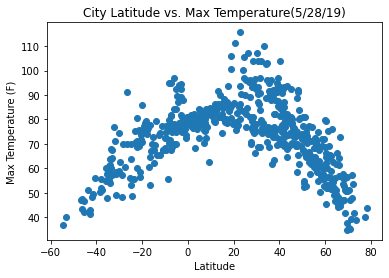

In [12]:
lat_vs_temp = weather_raw_data["Latitude"]
temp_plot = weather_raw_data["Max Temp"]

plt.scatter(lat_vs_temp,temp_plot)
plt.title('City Latitude vs. Max Temperature(5/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('pltlatitudevstemp')
plt.show()


## Latitude vs. Humidity Plot

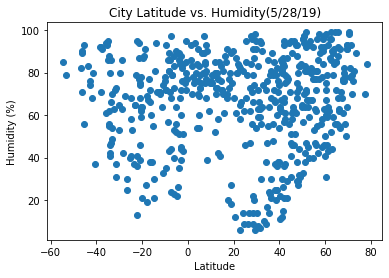

In [13]:
lat_vs_hum = weather_raw_data["Humidity"]

plt.scatter(lat_vs_temp,lat_vs_hum)
plt.title('City Latitude vs. Humidity(5/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('pltlatitudevshumidity')
plt.show()

## Latitude vs. Cloudiness Plot

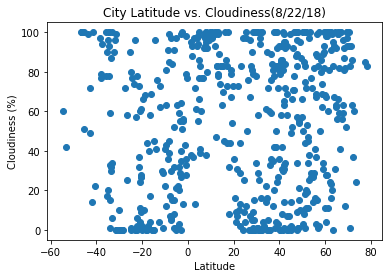

In [14]:
lat_vs_cloud = weather_raw_data["Cloudiness"]

plt.scatter(lat_vs_temp,lat_vs_cloud)
plt.title('City Latitude vs. Cloudiness(8/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('plotlatitudevscloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

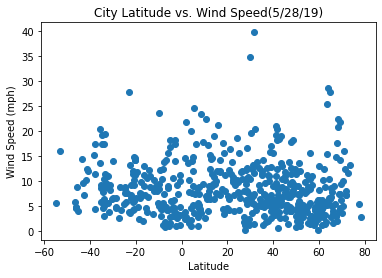

In [15]:
lat_vs_windspd = weather_raw_data["Wind Speed"]

plt.scatter(lat_vs_temp,lat_vs_windspd)
plt.title('City Latitude vs. Wind Speed(5/28/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('plotlatitudevswindspeed')
plt.show()

## Linear Regression

In [16]:
#Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    rege_values = x_values * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,rege_values,"r-")
    plt.annotate(line,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [17]:
northem_df = weather_raw_data.loc[weather_raw_data["Latitude"] >= 0,:]
southem_df = weather_raw_data.loc[weather_raw_data["Latitude"] < 0,:]

northem_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sémbé,1.6481,14.5806,79.30,70,93,2.55,CG,1627236000
5,Provideniya,64.3833,-173.3000,46.72,99,100,6.67,RU,1627236000
6,Nanortalik,60.1432,-45.2371,45.28,75,100,12.97,GL,1627236000
7,Puerto del Rosario,28.5004,-13.8627,77.29,66,0,16.64,ES,1627236000
9,Grants,35.1473,-107.8514,73.92,55,72,11.97,US,1627236000


In [18]:
southem_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Cape Town,-33.9258,18.4232,61.29,46,33,6.49,ZA,1627236000
2,Ushuaia,-54.8000,-68.3000,36.70,85,60,5.59,AR,1627236000
3,Castro,-24.7911,-50.0119,70.07,41,1,7.70,BR,1627236000
4,Contamana,-7.3333,-75.0167,94.77,44,97,1.90,PE,1627236000
8,Bredasdorp,-34.5322,20.0403,58.73,56,100,4.61,ZA,1627236000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6633568618911979


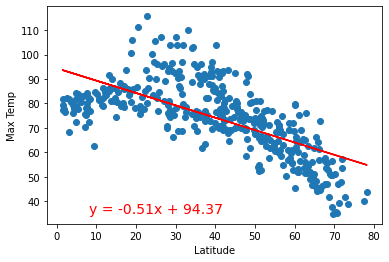

 The low r value indicates a highly negative correlation between latitude and maximum temperature


<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northem_df["Latitude"]
y_values = northem_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(8,35))

plt.savefig('northemtempvslat')

print(" The low r value indicates a highly negative correlation between latitude and maximum temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8059224015238178


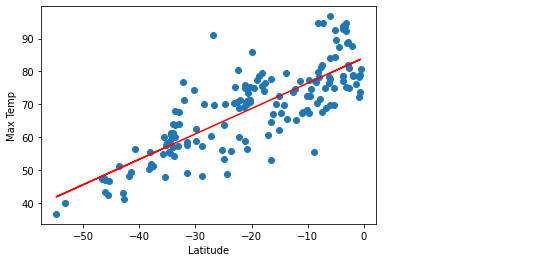

The high r value indicates a highly positive correlation between latitude and maximum temperature.


<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southem_df["Latitude"]
y_values = southem_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(8,35))

plt.savefig('southemtempvslat')

print("The high r value indicates a highly positive correlation between latitude and maximum temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.055639453230267776


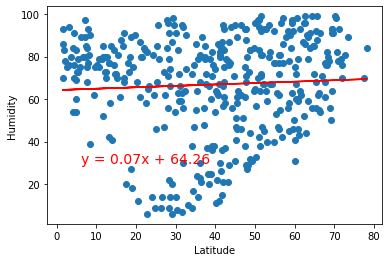

The r value indicates no relationship between latitude and humidity.


<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northem_df["Latitude"]
y_values = northem_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northemhumidvslat')

print("The r value indicates no relationship between latitude and humidity.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.09559304714190606


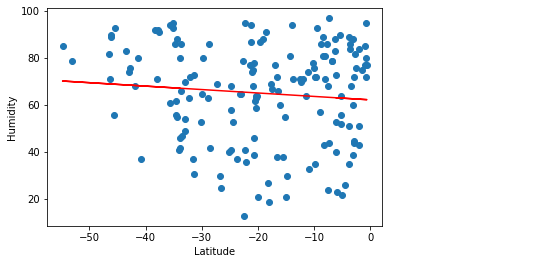

The r value indicates a slightly negative relationship between latitude and humidity.


<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southem_df["Latitude"]
y_values = southem_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southemhumidvslat')

print("The r value indicates a slightly negative relationship between latitude and humidity.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.03203067168033822


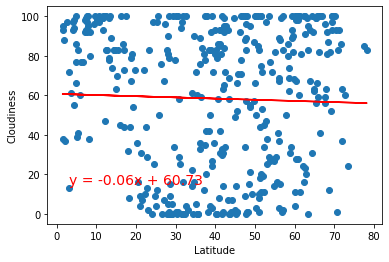

The r value indicates a slightly negative correlation between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northem_df["Latitude"]
y_values = northem_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(3,15))

plt.savefig('northemcloudvslat')

print("The r value indicates a slightly negative correlation between latitude and cloudiness.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.22322448647788046


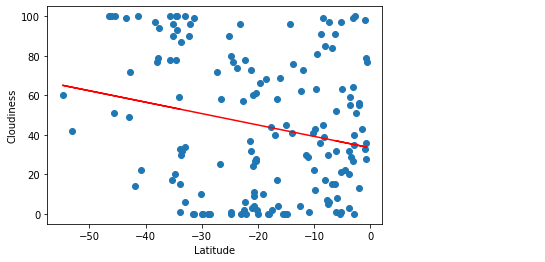

The low r value indicates a negative relationship between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southem_df["Latitude"]
y_values = southem_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southemcloudvslat')

print("The low r value indicates a negative relationship between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14828421118943888


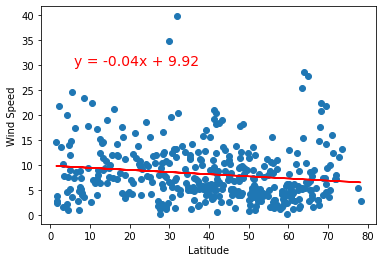

The r value indicates a slightly negative relationship between latitude and wind speed.


<Figure size 432x288 with 0 Axes>

In [25]:
x_values = northem_df["Latitude"]
y_values = northem_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northemwindvslat')

print("The r value indicates a slightly negative relationship between latitude and wind speed.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19478929236291792


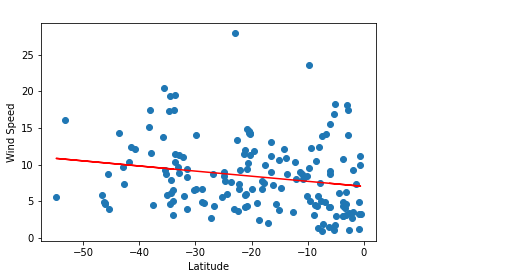

The low r value indicates a negative relationship between latitude and wind speed. 


<Figure size 432x288 with 0 Axes>

In [26]:
x_values = southem_df["Latitude"]
y_values = southem_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southemwindvslat')

print("The low r value indicates a negative relationship between latitude and wind speed. ")